Accuracy: 0.8285024154589372
Confusion Matrix:
 [[147  60]
 [ 11 196]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


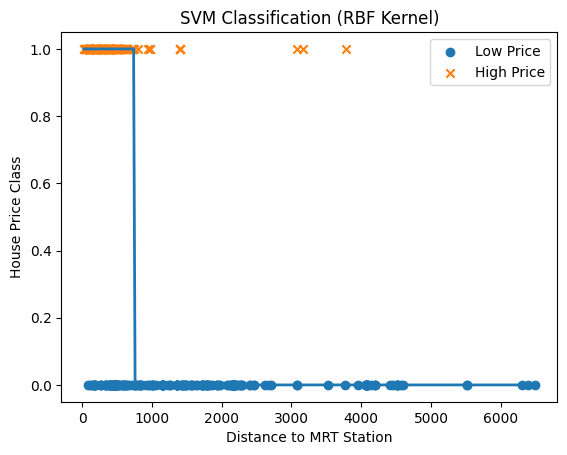

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# 2. Load dataset
df = pd.read_csv("/content/drive/MyDrive/Real estate.csv")

# 3. Create classification label
# High price = 1, Low price = 0
df['Price_Class'] = (df['Y house price of unit area'] >=
                     df['Y house price of unit area'].median()).astype(int)

# 4. Select ONE feature (for visualization)
X = df[['X3 distance to the nearest MRT station']]
y = df['Price_Class']

# 5. Feature Scaling (IMPORTANT for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train SVM Classifier (RBF kernel)
model = SVC(kernel='rbf', C=10, gamma='scale')
model.fit(X_scaled, y)

# 7. Predictions
y_pred = model.predict(X_scaled)

# 8. Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# 9. Plot decision boundary (curved)
X_grid = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_grid_scaled = scaler.transform(X_grid)
y_grid_pred = model.predict(X_grid_scaled)

plt.scatter(X[y==0], y[y==0], label="Low Price", marker='o')
plt.scatter(X[y==1], y[y==1], label="High Price", marker='x')
plt.plot(X_grid, y_grid_pred, linewidth=2)
plt.xlabel("Distance to MRT Station")
plt.ylabel("House Price Class")
plt.title("SVM Classification (RBF Kernel)")
plt.legend()
plt.show()
